In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import gdown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
salaries = pd.read_csv('/content/drive/MyDrive/ds_salaries.csv')

### A dataset containing relevant information about Data Scientists was used to conduct this analysis. The dataset includes the following variables:
Для проведення цього аналізу використовувався набір даних, що містить відповідну інформацію про Data Scientists. Набір даних включає такі змінні:

##### 1 work_year: Рік виплати заробітної плати.
##### 2 experience_level: Досвід роботи протягом року.
#### EN> Початковий рівень / Junior
#### MI> Середній рівень / Середній
#### SE> Старший рівень / Експерт
#### EX> Виконавчий рівень / Директор
##### 3 employment_type: Вид зайнятості на посаді.
#### PT> Неповний робочий день
#### FT> Повний робочий день
#### CT> Договір
#### FL> Позаштатний
##### 4 job_title: Роль працювала протягом року.
##### 5 salary: Загальна сума виплаченої зарплати.
##### 6 alary_currency: Валюта виплаченої зарплати як код валюти ISO 4217.
##### 7 salaryinusd: Зарплата в USD.
##### 8 employee_residence: Основна країна проживання працівника протягом робочого року як код країни ISO 3166.
##### 9 remote_ratio: Загальний обсяг роботи, виконаної дистанційно.
#### 10 company_location: Країна головного офісу роботодавця або філії за контрактом.
##### 11 company_size: середня кількість людей, які працювали в компанії протягом року.

In [ ]:
salaries.sample(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2039,2022,SE,FT,Data Specialist,110000,USD,110000,US,0,US,M


check for empty values

In [ ]:
salaries.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


### table information

In [ ]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### Let's analyze column by column 'salary_in_usd'

In [ ]:
salaries['salary_in_usd'].describe()

,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


### table column list

In [ ]:
salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### create a new table

In [ ]:
x_columns = ['experience_level', 'employment_type', 'job_title', 'company_size']
y_column = 'salary_in_usd'
data_columns = [y_column] + x_columns
data_columns

['salary_in_usd',
 'experience_level',
 'employment_type',
 'job_title',
 'company_size']

In [ ]:
list_df = ['salary_in_usd', 'experience_level', 'employment_type', 'job_title',
        'company_size']

In [ ]:
df_salaries = salaries[list_df]

In [ ]:
df_salaries.sample()

,salary_in_usd,experience_level,employment_type,job_title,company_size
225,115000,SE,FT,Data Engineer,M


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### we build a boxplot of dependencies (x ='experience_level', y = 'salary_in_usd')

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

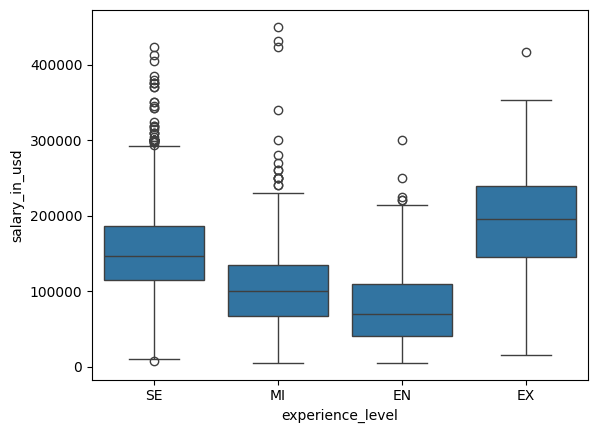

In [ ]:
sns.boxplot(data=salaries, x ='experience_level', y = 'salary_in_usd')

### after that we query the data and see EX level what is getting the most, even though there are the fewest of them

In [ ]:
sql = '''
    SELECT round(avg(salary_in_usd), 2) AS avg_salary, experience_level
FROM df_salaries AS ds
GROUP BY 2
ORDER BY 2 desc
'''

In [ ]:
select(sql)

,avg_salary,experience_level
0,153051.07,SE
1,104525.94,MI
2,194930.93,EX
3,78546.28,EN


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

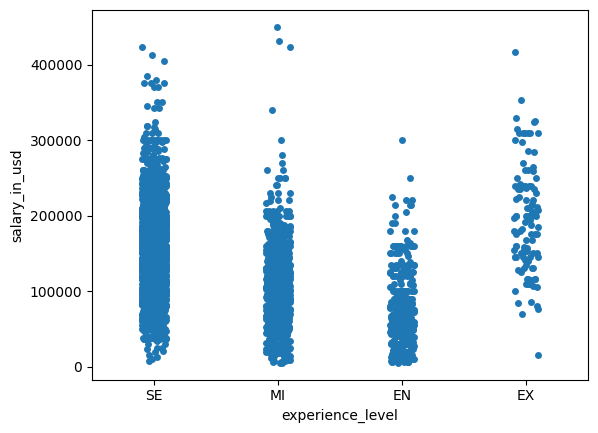

In [ ]:
sns.stripplot(x ='experience_level', y = 'salary_in_usd', data=salaries)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

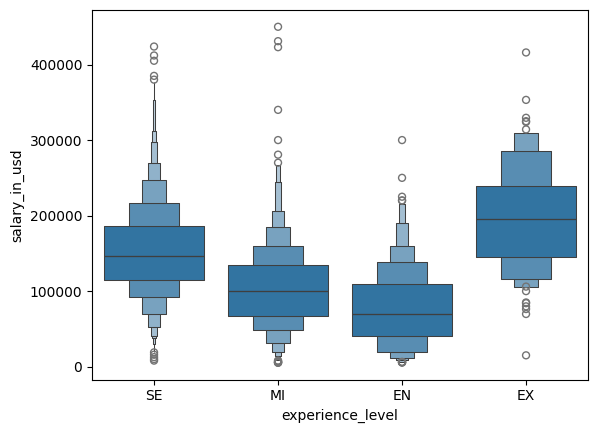

In [ ]:
sns.boxenplot(x ='experience_level', y = 'salary_in_usd', data=salaries)

[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

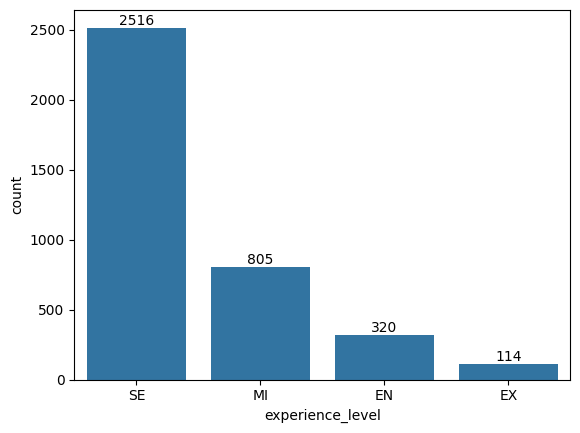

In [ ]:
ax = sns.countplot(x ='experience_level', data = df_salaries, )
ax.bar_label(ax.containers[0], fontsize=10)

# Create a file on Google Drive to store the database
# with the possibility of reuse

In [ ]:
con = sqlite3.connect(
    '/content/drive/MyDrive/window_functions.db')

In [ ]:
print(df_salaries.to_markdown())

|      |   salary_in_usd | experience_level   | employment_type   | job_title                                | company_size   |
|-----:|----------------:|:-------------------|:------------------|:-----------------------------------------|:---------------|
|    0 |           85847 | SE                 | FT                | Principal Data Scientist                 | L              |
|    1 |           30000 | MI                 | CT                | ML Engineer                              | S              |
|    2 |           25500 | MI                 | CT                | ML Engineer                              | S              |
|    3 |          175000 | SE                 | FT                | Data Scientist                           | M              |
|    4 |          120000 | SE                 | FT                | Data Scientist                           | M              |
|    5 |          222200 | SE                 | FT                | Applied Scientist                   

In [ ]:
# we add the table to the database
df_salaries.to_sql(
    'df_salaries',
    con,
    index = False,
    if_exists = 'replace'
)

3755

In [ ]:
# we set the function for writing requests
def select(sql):
    return pd.read_sql(sql, con)

In [ ]:
# let's create a request to check the downloaded
# to the database employees
sql = '''
    SELECT
      CASE WHEN experience_level = 'EN' THEN 'Entry-level'
        WHEN experience_level = 'MI' THEN 'Mid-level'
        WHEN experience_level = 'SE' THEN 'Senior-level'
        ELSE 'Executive-level'
	  END AS exp_level,
	    CASE WHEN employment_type = 'PT' THEN 'Part-time'
        WHEN employment_type = 'FT' THEN 'Full-time'
        WHEN employment_type = 'CT' THEN 'Contract'
        ELSE 'Freelance'
      END AS emp_type, company_size,
	    max(salary_in_usd) as min_salary,
      min(salary_in_usd) as min_salary,
      sum(salary_in_usd) as sum_salary
    FROM df_salaries AS ds
    GROUP BY 1
'''

In [ ]:
select(sql)

,exp_level,emp_type,company_size,max(salary_in_usd),min_salary,sum(salary_in_usd)
0,Entry-level,Full-time,L,300000,5409,25134811
1,Executive-level,Full-time,M,416000,15000,22222126
2,Mid-level,Full-time,M,450000,5132,84143381
3,Senior-level,Full-time,L,423834,8000,385076496


In [ ]:
# total amount of wages in IT
sql = '''
  SELECT sum(salary_in_usd) as total
  FROM df_salaries
'''

In [ ]:
select(sql)

,total
0,516576814


In [ ]:
# we find the amount each level received
sql = '''
    SELECT CASE WHEN experience_level = 'EN' THEN 'Entry-level'
		WHEN experience_level = 'MI' THEN 'Mid-level'
		WHEN experience_level = 'SE' THEN 'Senior-level'
		ELSE 'Executive-level'
	END AS exp_level,
		 sum(salary_in_usd)
FROM df_salaries AS ds
GROUP BY 1
'''

In [ ]:
select(sql)

,exp_level,sum(salary_in_usd)
0,Entry-level,25134811
1,Executive-level,22222126
2,Mid-level,84143381
3,Senior-level,385076496
